<a href="https://colab.research.google.com/github/krisdsutton/data201/blob/main/Kris_Sutton_Data201_Project2_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 201 Project 2 Obesity Data - Logistic Regression Model
### Kris Sutton
### December 2, 2021

## Dataset - Estimation of obesity levels based on eating habits and physical condition
### Source: UCI Machine Learning Repository
#### https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Additional Source: Kaggle
https://www.kaggle.com/pmrich/obesitydataset-eda-data-prep-ml-hypertuning


### Dataset information

The dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The dataset was contributed to the UCI Machine Learning Repository on 2019-08-27.

**Number of observations:** 2111

**Number of variables:** 17

**Data Dictionary:**  

Category	| Feature Name | Description | Variable Type
--------- | ------------ | ------------ | -------------- 
Target Variable | NObesity | Based on BMI | Categorical
Eating Habits |	FAVC | Frequent consumption of high caloric food | Categorical 
Eating Habits |	FCVC | Frequency of consumption of vegetables	| Ordinal 
Eating Habits	| NCP | Number of main meals | Ordinal
Eating Habits	| CAEC | Consumption of food between meals | Ordinal
Eating Habits	| CH20 | Consumption of water daily | Ordinal
Eating Habits	| CALC | Consumption of alcohol | Ordinal
Physical Conditioning | SCC | Calories consumption monitoring | Categorical
Physical Conditioning | FAF	| Pysical activity frequency | Ordinal
Physical Conditioning | TUE	| Time using technology devices | Ordinal
Physical Conditioning | MTRANS | Transportation used | Categorical
Physical Conditioning | SMOKE |	Smokes Yes or No | Categorical
Responder Characteristics | Family History with Overweight | Yes or No | Categorical
Responder Charateristics | Gender | Male or Female | Categorical
Responder Charateristics | Age | Age in years | Integer
Responder Charateristics | Height | Height in meters | Float
Responder Charateristics | Weight | Weight in kilograms | Float

## Project 2 Questions

1. Is BMI distribution approximately normal? 
2. How many records are in each categorical variable?
3. Which variables create the model with the highest accuracy?



##Ingesting, wrangling, and cleaning data.

In [813]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib as mpl 
#import pyplot
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import sklearn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
!pip install --upgrade scipy --user
plt.style.use('classic')

from pandas_profiling import ProfileReport
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

Read the obesity dataset and look at the first few rows.

In [814]:
# read obesity dataset
obesity = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
ob_clean = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [815]:
#Checking for N/A
obesity.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [816]:
#Counting "n/a"s in dataset
obesity.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Calculate Body Mass Index (BMI) = $weight (kg)$ / $(height (m))^2$

In [817]:
# create BMI column
obesity['BMI'] = obesity['Weight'] / obesity['Height'] ** 2
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [818]:
# renaming 'family_history_with_oveweight' column to be shorter
obesity.rename(columns={'family_history_with_overweight': 'Family'}, inplace=True)

##EDA

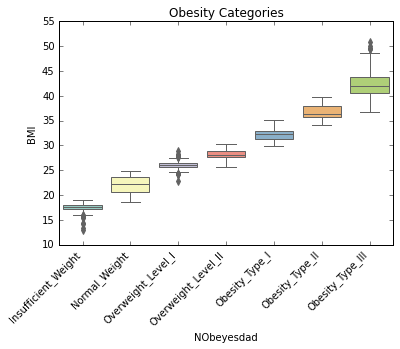

In [819]:
# create boxplot for BMI
%matplotlib inline
ax=sns.boxplot(y='BMI', x='NObeyesdad', data=obesity, palette="Set3", order=['Insufficient_Weight','Normal_Weight', 
              'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
ax.set_title('Obesity Categories')
ax.set_ylabel('BMI')
ax.set_xticklabels(rotation=45, horizontalalignment='right', labels=['Insufficient_Weight','Normal_Weight', 
              'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.show();

Boxplots shows most categories with normal distribution, with OB Type II being slightly right skewed.  Insufficient, OW Level II, and OB Type III have a few outliers.


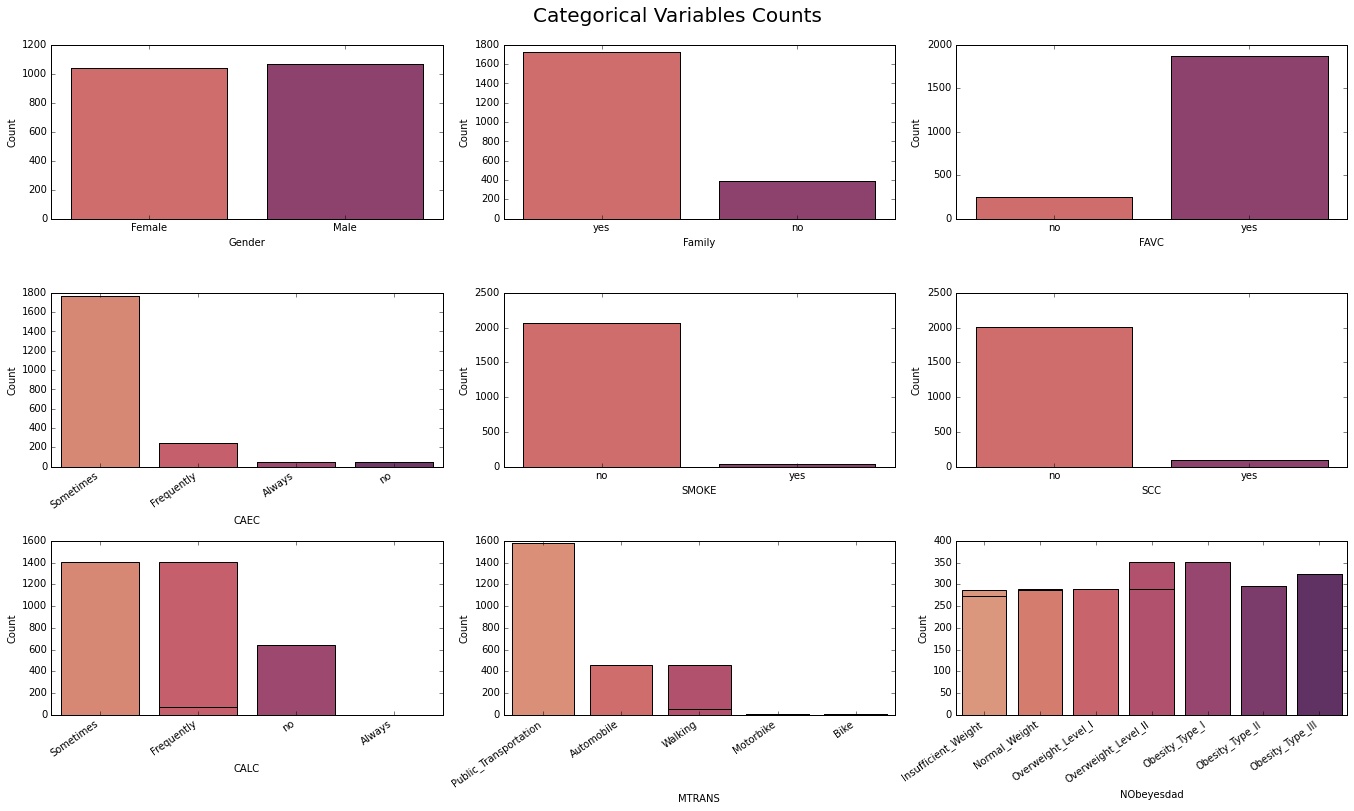

In [820]:
# count plots for ordinal variables
columns = ['Gender', 'Family', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(20, 12))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(obesity[col], ax=subplot, palette='flare')
    
    if col=="MTRANS":
        sns.countplot(obesity[col],ax=subplot, palette='flare', order=['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike' ])
        subplot.set_xticklabels(rotation=35, horizontalalignment='right', labels=['Public_Transportation', 'Automobile', 
                                                                                  'Walking', 'Motorbike', 'Bike' ])        
        subplot.yaxis.label.set_text("Count")
    elif col=="CAEC":
        sns.countplot(obesity[col],ax=subplot, palette='flare', order=['Sometimes', 'Frequently', 'Always', 'no'])
        subplot.set_xticklabels(rotation=35, horizontalalignment='right', labels=['Sometimes', 'Frequently', 'Always', 'no'])        
        subplot.yaxis.label.set_text("Count")
    elif col=="CALC":
        sns.countplot(obesity[col],ax=subplot, palette='flare', order=['Sometimes', 'Frequently', 'no', 'Always'])
        subplot.set_xticklabels(rotation=35, horizontalalignment='right', labels=['Sometimes', 'Frequently', 'no', 'Always'])        
        subplot.yaxis.label.set_text("Count")
    elif col=="NObeyesdad":
        sns.countplot(obesity[col],ax=subplot, palette='flare', order=['Insufficient_Weight','Normal_Weight', 
              'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
        subplot.set_xticklabels(rotation=35, horizontalalignment='right', labels=['Insufficient_Weight','Normal_Weight', 
              'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])  
        subplot.yaxis.label.set_text("Count")
    else:
        sns.countplot(obesity[col],ax=subplot, palette='flare')  
        subplot.yaxis.label.set_text("Count")
        
#show plots
fig.suptitle("Categorical Variables Counts", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

Changing some categorical data to int.

In [821]:
# creating a dict file 
family = {'yes': 1,'no': 0}
favc = {'yes': 1,'no': 0}
smoke = {'yes': 1,'no': 0}
scc = {'yes': 1,'no': 0}
  
# traversing through dataframe
# family, favc, smoke, scc column and writing
# values where key matches
obesity.Family = [family[item] for item in obesity.Family]
obesity.FAVC = [favc[item] for item in obesity.FAVC]
obesity.SMOKE = [smoke[item] for item in obesity.SMOKE]
obesity.SCC = [scc[item] for item in obesity.SCC]
obesity.head()

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [822]:
# adding to dict file
# caec - discuss with Professor how you rank categorical variables when the original question is unclear?   
caec = {'Always': 3,'Frequently': 2,'Sometimes': 1,'no': 0}
calc = {'Always': 3,'Frequently': 2,'Sometimes': 1,'no': 0}
  
# traversing through dataframe
# caec, calc column and writing
# values where key matches
obesity.CAEC = [caec[item] for item in obesity.CAEC]
obesity.CALC = [calc[item] for item in obesity.CALC]
obesity.head()

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,28.342381


In [823]:
# adding to dict file if obese or not obese   
gender = {'Female': 0,'Male': 1}
  
# traversing through dataframe
# nobeyesdad column and writing
# values where key matches
obesity.Gender = [gender[item] for item in obesity.Gender]
obesity.head()

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,28.342381


In [824]:
#creating a correlation matrix to see which variables I want in the model.
corrM_2 = obesity.corr()
corrM_2

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,-0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,-0.007616,-0.053035
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.244163
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.131785
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,0.934806
Family,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.483508
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,0.246097
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.263651
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.039969
CAEC,-0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.313278
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,-0.000819


In [825]:
#converting dataset to a dataframe to chart
ob_corr_df = pd.DataFrame(corrM_2)

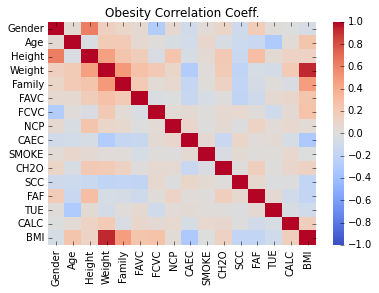

In [826]:
#creating heat map of correlated data
ob_heatmap = sns.heatmap(ob_corr_df, cmap="coolwarm", vmin=-1, vmax=1)
ob_heatmap.set_title("Obesity Correlation Coeff.")

plt.show()

Weight and obesity are very related so its possible it could add bias to the models.  I will create some models without the weight variable to see its effect.

#Models Part I - Seven Classes

In [827]:
# adding to dict file to create 7 categories for obesity   
obese = {'Insufficient_Weight': 0,'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,'Obesity_Type_I': 4,'Obesity_Type_II': 5,
         'Obesity_Type_III': 6}
  
# traversing through dataframe
# nobeyesdad column and writing
# values where key matches
obesity.NObeyesdad = [obese[item] for item in obesity.NObeyesdad]
obesity.head()

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,3,28.342381


##Model A: 7 Classes - No Weight

In [828]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Age', 'Height', 'Family','FAVC','CAEC','SMOKE', 'FAF', 'CALC', 'FCVC', 'NCP', 'Gender',
                'CH2O', 'SCC', 'TUE']
X = obesity[feature_cols] # Features
y = obesity.NObeyesdad # Target variable

In [829]:
X.head()

,Age,Height,Family,FAVC,CAEC,SMOKE,FAF,CALC,FCVC,NCP,Gender,CH2O,SCC,TUE
0,21.0,1.62,1,0,1,0,0.0,0,2.0,3.0,0,2.0,0,1.0
1,21.0,1.52,1,0,1,1,3.0,1,3.0,3.0,0,3.0,1,0.0
2,23.0,1.80,1,0,1,0,2.0,2,2.0,3.0,1,2.0,0,1.0
3,27.0,1.80,0,0,1,0,2.0,2,3.0,3.0,1,2.0,0,0.0
4,22.0,1.78,0,0,1,0,0.0,1,2.0,1.0,1,2.0,0,0.0


In [830]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [831]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

# predict
y_pred=logreg.predict(X_test)

In [832]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1 2 3 4 5 6]
Intercept [ 0.45401197  0.55543379  0.63815514  0.05361081  0.02762735 -0.9449119
 -0.78392716]
Coefficients [[-0.16558816  0.61972925 -2.49480069 -0.00506223  1.64120049 -0.29345157
   0.38743385 -0.66772451  0.27170475  0.57982617 -0.45348622  0.12125235
   0.14955517  0.49067261]
 [-0.00996351  0.49363581 -1.70258689 -0.76884705  1.8712294   0.41795516
   0.51174899 -0.19311829 -0.45999507  0.02813177  0.23214225 -0.11364337
   0.39396355  0.21158524]
 [ 0.03446017  0.65723385 -0.95472086  0.77561575 -0.65898265 -0.21924238
   0.25627542  0.42883136 -0.61449177 -0.06339138 -0.43450465  0.2003166
   1.2105163  -0.01917568]
 [ 0.13750285  0.05125361  1.03043013 -1.75225593  0.08946442 -0.20736215
  -0.10001176 -0.46279021 -0.58752172 -0.47022522  0.81240288  0.10199494
  -0.19660287  0.36374326]
 [ 0.08726074 -0.10519222  1.53376947  0.96635904  0.07301852  0.00482823
   0.1034649  -0.49630133 -1.09478878 -0.50633459  0.10261767  0.4067399
  -0.42019233  0.0327

In [833]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.5738636363636364
              precision    recall  f1-score   support

           0       0.63      0.62      0.62        78
           1       0.37      0.30      0.33        69
           2       0.51      0.29      0.37        68
           3       0.34      0.20      0.25        66
           4       0.51      0.64      0.57        86
           5       0.58      0.79      0.67        73
           6       0.80      1.00      0.89        88

    accuracy                           0.57       528
   macro avg       0.53      0.55      0.53       528
weighted avg       0.55      0.57      0.55       528



Accuracy:  of the total number of inputs 57.39% were predicted accurantely.


In [834]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48, 16,  4,  1,  5,  4,  0],
       [21, 21,  7,  6,  4,  3,  7],
       [ 3, 11, 20,  7, 14,  6,  7],
       [ 2,  6,  5, 13, 21, 16,  3],
       [ 2,  3,  2,  6, 55, 13,  5],
       [ 0,  0,  1,  5,  9, 58,  0],
       [ 0,  0,  0,  0,  0,  0, 88]])

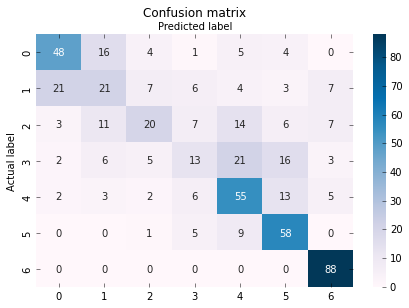

In [835]:
#name of classes
%matplotlib inline
class_names=[0, 1, 2, 3, 4, 5, 6]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6])
ax.yaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6]);

In [836]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.5738636363636364
Precision: 0.5467258504977803
Recall: 0.5738636363636364


##Model B: 7 Classes - With Weight

In [837]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Weight','Age', 'Height', 'Family','FAVC','CAEC','SMOKE', 'FAF', 'CALC', 'FCVC', 'NCP', 'Gender',
                'CH2O', 'SCC', 'TUE']
X = obesity[feature_cols] # Features
y = obesity.NObeyesdad # Target variable

In [838]:
X.head()

,Weight,Age,Height,Family,FAVC,CAEC,SMOKE,FAF,CALC,FCVC,NCP,Gender,CH2O,SCC,TUE
0,64.0,21.0,1.62,1,0,1,0,0.0,0,2.0,3.0,0,2.0,0,1.0
1,56.0,21.0,1.52,1,0,1,1,3.0,1,3.0,3.0,0,3.0,1,0.0
2,77.0,23.0,1.80,1,0,1,0,2.0,2,2.0,3.0,1,2.0,0,1.0
3,87.0,27.0,1.80,0,0,1,0,2.0,2,3.0,3.0,1,2.0,0,0.0
4,89.8,22.0,1.78,0,0,1,0,0.0,1,2.0,1.0,1,2.0,0,0.0


In [839]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [840]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

# predict
y_pred=logreg.predict(X_test)

In [841]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1 2 3 4 5 6]
Intercept [ 0.68848811  0.40209708  0.17463724 -0.10467436 -0.23361682 -0.64232758
 -0.28460367]
Coefficients [[-0.33467152  0.08748696  1.22142769 -0.11513698  0.56258297  1.2279407
  -0.0515834   1.21389521  0.26053596  1.87710777  2.4102893   0.31150164
   1.22165178  0.11417139  0.99400106]
 [-0.13024476  0.04328284  0.68422941 -0.15861747  0.01345324  1.28916035
   0.08696359  1.01334825  0.28014081  0.7263078   1.04342948  0.38264414
   0.53803366  0.13460336  0.34846985]
 [-0.02549718  0.07551174  0.28606113 -0.0593659   0.3819335  -0.46322252
  -0.04244002  0.237181    0.5047966   0.06801532  0.03716183  0.02635895
   0.5818066   0.17360986 -0.02835242]
 [ 0.03487941  0.12530396 -0.12743806  0.4483718  -0.51240045 -0.3842688
  -0.0204102  -0.19319788 -0.32381205 -0.47953678 -0.62794691  0.37292286
   0.01760519 -0.11655696  0.19289907]
 [ 0.10376423  0.07583046 -0.43822212  0.29426696  0.0711078  -0.39750938
  -0.02584324 -0.17399976 -0.65301736 -1.28274

In [842]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.6590909090909091
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        78
           1       0.46      0.51      0.48        69
           2       0.53      0.46      0.49        68
           3       0.46      0.47      0.47        66
           4       0.59      0.42      0.49        86
           5       0.75      0.92      0.83        73
           6       0.89      1.00      0.94        88

    accuracy                           0.66       528
   macro avg       0.64      0.65      0.64       528
weighted avg       0.65      0.66      0.65       528



Accuracy increases to 65.91% were predicted accurantely.


In [843]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[60, 17,  1,  0,  0,  0,  0],
       [18, 35, 11,  5,  0,  0,  0],
       [ 0, 15, 31,  9, 10,  3,  0],
       [ 0,  8, 10, 31, 10,  5,  2],
       [ 0,  1,  5, 21, 36, 14,  9],
       [ 0,  0,  0,  1,  5, 67,  0],
       [ 0,  0,  0,  0,  0,  0, 88]])

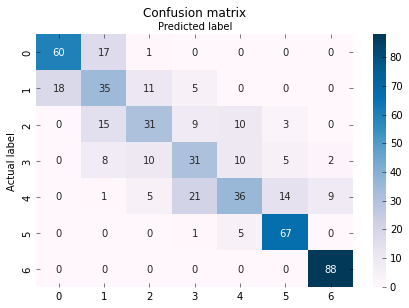

In [844]:
#name of classes
%matplotlib inline
class_names=[0, 1, 2, 3, 4, 5, 6]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6])
ax.yaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6]);

In [845]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.6590909090909091
Precision: 0.648844381763579
Recall: 0.6590909090909091


#Models Part II - Two Classes

Changing 'NObeyesdad' variable from 7 unique values to 2.  Now there is just 'Not Obese' and 'Obese'.

In [846]:
# adding to dict file if obese or not obese   
obese = {0: 'Not Obese',  1: 'Not Obese', 2: 'Not Obese', 3: 'Not Obese', 4: 'Obese', 5: 'Obese',
         6: 'Obese'}
  
# traversing through dataframe
# nobeyesdad column and writing
# values where key matches
obesity.NObeyesdad = [obese[item] for item in obesity.NObeyesdad]
obesity.head()

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Not Obese,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Not Obese,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Not Obese,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Not Obese,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Not Obese,28.342381


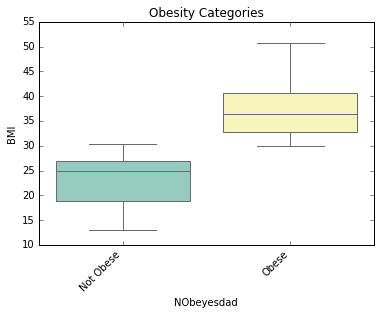

In [847]:
#creating new box plot for changed variable 'NObeyesdad
ax=sns.boxplot(y='BMI', x='NObeyesdad', data=obesity, palette="Set3", order=['Not Obese','Obese'])
ax.set_title('Obesity Categories')
ax.set_ylabel('BMI')
ax.set_xticklabels(rotation=45, horizontalalignment='right', labels=['Not Obese','Obese'])
plt.show();

'Not Obese' is slightly left skewed and 'Obese' is normally distributed.  No outliers.

In [848]:
##Counting records by bmi category to compare male and female categories
bmi_cat_count = obesity.groupby(['NObeyesdad']).size().reset_index(name='Count')
bmi_cat_count


,NObeyesdad,Count
0,Not Obese,1139
1,Obese,972


##Mode C:  OVR - No Weight

In [849]:
# adding to dict file if obese or not obese   
obese = {'Not Obese': 0,'Obese': 1}
  
# traversing through dataframe
# nobeyesdad column and writing
# values where key matches
obesity.NObeyesdad = [obese[item] for item in obesity.NObeyesdad]
obesity.head()

,Gender,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,0,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,0,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,0,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,0,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,0,28.342381


In [850]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Age', 'Height', 'Family','FAVC','CAEC','SMOKE', 'FAF', 'CALC', 'FCVC', 'NCP', 'Gender',
                'CH2O', 'SCC', 'TUE']
X = obesity[feature_cols] # Features
y = obesity.NObeyesdad # Target variable

In [851]:
X.head()

,Age,Height,Family,FAVC,CAEC,SMOKE,FAF,CALC,FCVC,NCP,Gender,CH2O,SCC,TUE
0,21.0,1.62,1,0,1,0,0.0,0,2.0,3.0,0,2.0,0,1.0
1,21.0,1.52,1,0,1,1,3.0,1,3.0,3.0,0,3.0,1,0.0
2,23.0,1.80,1,0,1,0,2.0,2,2.0,3.0,1,2.0,0,1.0
3,27.0,1.80,0,0,1,0,2.0,2,3.0,3.0,1,2.0,0,0.0
4,22.0,1.78,0,0,1,0,0.0,1,2.0,1.0,1,2.0,0,0.0


In [852]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [853]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

# predict
y_pred=logreg.predict(X_test)

The multinomial logistic regression model will be fit using (OVR) cross-entropy (measuring the difference between two probability distributions) loss and will predict the integer value for each integer encoded class label.

With OVR parameter estimates are the odds ratio for being in the modeled class vs in other classes with a change in unit of that parameter.

Source (https://etr359.medium.com/multi-class-classification-in-python-691821655636 [link text](https://))

In [854]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1]
Intercept [-8.18906232]
Coefficients [[ 0.03451902  1.25369977  2.98954415  2.1871363  -1.31663813  1.3581021
  -0.40121632  0.09412367  0.83945988 -0.00392512 -0.13332498  0.1690373
  -2.06096245 -0.24047414]]


Intercept:  the expected mean of each categorical variable when all x is zero.

Coefficient:  the size and direction of the relationship between a predictor and the response variable. 

In [855]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.759469696969697
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       281
           1       0.71      0.83      0.76       247

    accuracy                           0.76       528
   macro avg       0.77      0.76      0.76       528
weighted avg       0.77      0.76      0.76       528



Accuracy:  of the total number of inputs 75.76% were predicted accurantely.


In [856]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[196,  85],
       [ 42, 205]])

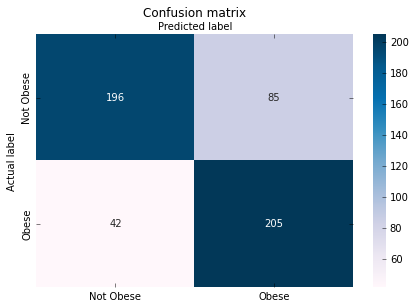

In [857]:
#name of classes
%matplotlib inline
class_names=['Not Obese', 'Obese']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Not Obese', 'Obese'])
ax.yaxis.set_ticklabels(['Not Obese', 'Obese']);

In [858]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.759469696969697
Precision: 0.768968206404819
Recall: 0.759469696969697


Precision:  Model correctly predicted 76.9% positive predictions of input

Recall:  Model’s predictive accuracy for the positive class is 75.75%


Rebuilding Model with Weight added.

##Model D:  OVR - With Weight

In [859]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Weight','Age', 'Height', 'Family','FAVC','CAEC','SMOKE', 'FAF', 'CALC', 'FCVC', 'NCP', 'Gender',
                'CH2O', 'SCC', 'TUE']
X = obesity[feature_cols] # Features
y = obesity.NObeyesdad # Target variable

In [860]:
X.head()

,Weight,Age,Height,Family,FAVC,CAEC,SMOKE,FAF,CALC,FCVC,NCP,Gender,CH2O,SCC,TUE
0,64.0,21.0,1.62,1,0,1,0,0.0,0,2.0,3.0,0,2.0,0,1.0
1,56.0,21.0,1.52,1,0,1,1,3.0,1,3.0,3.0,0,3.0,1,0.0
2,77.0,23.0,1.80,1,0,1,0,2.0,2,2.0,3.0,1,2.0,0,1.0
3,87.0,27.0,1.80,0,0,1,0,2.0,2,3.0,3.0,1,2.0,0,0.0
4,89.8,22.0,1.78,0,0,1,0,0.0,1,2.0,1.0,1,2.0,0,0.0


In [861]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [862]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [863]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1]
Intercept [-5.38023761]
Coefficients [[ 0.30783739 -0.02690949 -9.02713228 -0.16680384  0.13045935 -0.25395253
   0.55816062 -0.09625886 -0.50038407 -0.93134551 -0.07070662 -3.03239228
  -0.11379259 -0.88731211 -0.68834593]]


Intercept went down by about -0.3.

Most coefficients increased. 

In [864]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.9526515151515151
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       281
           1       0.95      0.94      0.95       247

    accuracy                           0.95       528
   macro avg       0.95      0.95      0.95       528
weighted avg       0.95      0.95      0.95       528



Accuracy increased to 95.27%.


In [865]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[270,  11],
       [ 14, 233]])

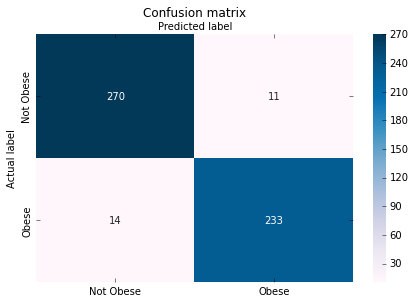

In [866]:
#name of classes
%matplotlib inline
class_names=['Not Obese', 'Obese']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Not Obese', 'Obese'])
ax.yaxis.set_ticklabels(['Not Obese', 'Obese']);

In [867]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.9526515151515151
Precision: 0.9526754572392127
Recall: 0.9526515151515151


Precision increased to 95.27 % and recal to 95.27%.


Running model again with multinomial 'multi-class', and weight taken back out.  Multinomial will compare each class label to all others one-on-one.

##Model E:  Multimonial - No Weight

In [868]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Age', 'Height', 'Family','FAVC','CAEC','SMOKE', 'FAF', 'CALC', 'FCVC', 'NCP', 'Gender',
                'CH2O', 'SCC', 'TUE']
X = obesity[feature_cols] # Features
y = obesity.NObeyesdad # Target variable

In [869]:
X.head()

,Age,Height,Family,FAVC,CAEC,SMOKE,FAF,CALC,FCVC,NCP,Gender,CH2O,SCC,TUE
0,21.0,1.62,1,0,1,0,0.0,0,2.0,3.0,0,2.0,0,1.0
1,21.0,1.52,1,0,1,1,3.0,1,3.0,3.0,0,3.0,1,0.0
2,23.0,1.80,1,0,1,0,2.0,2,2.0,3.0,1,2.0,0,1.0
3,27.0,1.80,0,0,1,0,2.0,2,3.0,3.0,1,2.0,0,0.0
4,22.0,1.78,0,0,1,0,0.0,1,2.0,1.0,1,2.0,0,0.0


In [870]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [871]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [872]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1]
Intercept [-2.63846649]
Coefficients [[ 0.01266197 -0.1353965   1.55043337  1.190127   -0.57169821  0.64356791
  -0.14569745  0.11038536  0.3562764  -0.02029473 -0.0446148   0.01749251
  -1.10567629 -0.171637  ]]


In [873]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.7575757575757576
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       281
           1       0.70      0.84      0.76       247

    accuracy                           0.76       528
   macro avg       0.77      0.76      0.76       528
weighted avg       0.77      0.76      0.76       528



Accuracy back down to 75.76%


In [874]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[193,  88],
       [ 40, 207]])

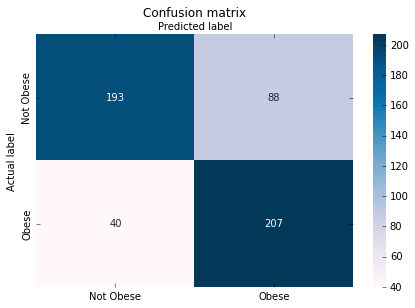

In [875]:
#name of classes
%matplotlib inline
class_names=['Not Obese', 'Obese']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Not Obese', 'Obese'])
ax.yaxis.set_ticklabels(['Not Obese', 'Obese']);

In [876]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.7575757575757576
Precision: 0.7690876907578733
Recall: 0.7575757575757576


Running multinomial 'multi-class' model again with weight back in.

##Model F:  Multinomial with Weight

In [877]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Weight','Age', 'Height', 'Family','FAVC','CAEC','SMOKE', 'FAF', 'CALC', 'FCVC', 'NCP', 'Gender',
                'CH2O', 'SCC', 'TUE']
X = obesity[feature_cols] # Features
y = obesity.NObeyesdad # Target variable

In [878]:
X.head()

,Weight,Age,Height,Family,FAVC,CAEC,SMOKE,FAF,CALC,FCVC,NCP,Gender,CH2O,SCC,TUE
0,64.0,21.0,1.62,1,0,1,0,0.0,0,2.0,3.0,0,2.0,0,1.0
1,56.0,21.0,1.52,1,0,1,1,3.0,1,3.0,3.0,0,3.0,1,0.0
2,77.0,23.0,1.80,1,0,1,0,2.0,2,2.0,3.0,1,2.0,0,1.0
3,87.0,27.0,1.80,0,0,1,0,2.0,2,3.0,3.0,1,2.0,0,0.0
4,89.8,22.0,1.78,0,0,1,0,0.0,1,2.0,1.0,1,2.0,0,0.0


In [879]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [880]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [881]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1]
Intercept [-2.96802195]
Coefficients [[ 0.18626527 -0.0156531  -5.75085851 -0.35317852 -0.13849365 -0.29430044
   0.34699931  0.0924617  -0.03016864 -0.37039816  0.01075409 -1.9288951
  -0.12369212 -0.61688243 -0.31100795]]


In [882]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.9659090909090909
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       281
           1       0.96      0.97      0.96       247

    accuracy                           0.97       528
   macro avg       0.97      0.97      0.97       528
weighted avg       0.97      0.97      0.97       528



In [883]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[270,  11],
       [  7, 240]])

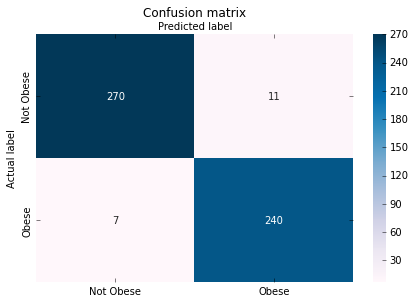

In [884]:
#name of classes
%matplotlib inline
class_names=['Not Obese', 'Obese']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Not Obese', 'Obese'])
ax.yaxis.set_ticklabels(['Not Obese', 'Obese']);

In [885]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.9659090909090909
Precision: 0.9660496510838824
Recall: 0.9659090909090909


Precision increased to 96.6% and recall to 96.59%.

#Conclusion

In Part I of model buidling with this data set I learned adding weight improves the accurancy of predicting the seven classes from about 57% to 66% using multinomial classification.  Using the same multinomial method you can further increase the accuracy, but possibly add bias to the model, if you decrease the classes from seven to two (obese vs not obese).

##References
https://etr359.medium.com/multi-class-classification-in-python-691821655636

https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

https://www.kaggle.com/pmrich/obesitydataset-eda-data-prep-ml-hypertuning

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

https://newbedev.com/sklearn-plot-confusion-matrix-with-labels

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

https://etr359.medium.com/multi-class-classification-in-python-691821655636

